# Controller #

Import all neccessary packages

In [1]:
import os
import pandas as pd
import numpy as np

from controllers.inference_controllers.sandbox import Sandbox
from controllers.inference_controllers.generator import Generator
from controllers.inference_controllers.optimiser import Optimiser

from toolboxes.plotting_toolbox.domain import Domain
from toolboxes.inference_toolbox.parameter import Parameter
from toolboxes.inference_toolbox.model import Model
from toolboxes.inference_toolbox.likelihood import Likelihood

current_directory = os.getcwd()
if current_directory != '/project/':
    os.chdir('/project/')

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Defining simulated data

In [2]:
# data_params = {
#     'data_type': 'simulated_data',
#     'model': {
#         'model_select': 'log_gpm_norm',
#         'model_params':{
#             'H': 5
#         },
#         'inference_params':{
#             'I_y': 1.6,
#             'I_z': 1.2,
#             'Q': 3e13,
#             'sigma': 0.05
#         }
#     },
#     'domain':{
#         'domain_select': 'cone_from_source_z_limited',
#         'domain_params': {
#             'r': 1000,
#             'theta': np.pi/8,
#             'source': [0,0,10]
#         },
#         'resolution': 20
#     },
#     'noise_dist': 'gaussian',
#     'noise_level': 0.05,
#     'output_header': 'Concentration',
# }

data_params = {
    'data_type': 'normalised_data',
    'data_select': 'GBR_data',
    'normaliser_select': 'GBR_normaliser',
    'normaliser_params':{
        'experiments_list': [
            'Exp1',
            'Exp2',
            'Exp3',
            'Exp4',
            'Exp5',
            'Exp6',
            'Exp7',
            'Exp8',
            'Exp9',
            'Exp10',
            'Exp11',
            'Exp12',
        ],
        'meta_data_select': 'GBR_data_summary',
        'input_header': 'Concentration'
    },
    'log':True,
    'output_header': 'Concentration',
    'gridding': [100,100,25]
}

prior_plots = [
    {
        'Q': [1e12, 5e13],
        'references':{
            'Q' : [2.82e13, 3.11e13, 2.89e13, 4.83e13],
            'labels': ['250m','200m','750m','1000m'] 
        },
    },
    {
        'sigma': [0.001, 0.1],
    },
    {
        'I_y': [0.0001, 1.7],
        'I_z': [0.0001, 1.7],
        'references':{
            'I_y' : [0.22, 1.6, 0.11, 0.08, 0.06, 0.04],
            'I_z' : [0.2, 1.2, 0.08, 0.06, 0.03, 0.016],
            'labels': ['A','B','C','D','E','F'] 
        }
    }
]

results_name = 'test'

Defining default parameters and prior plots for gamma priors of the simulated data

In [3]:
default_params = {
    'infered_params':pd.Series({
        'model_params':pd.Series({
            'I_y_and_I_z': Parameter('I_y','I_z', prior_select='log_norm', order = 1)
                                    .add_prior_param('mu', [0.4,0.4])
                                    .add_prior_param('cov', [[0.8,0],[0,0.8]]),
            'Q': Parameter('Q', prior_select = 'log_norm', order = 1e13).add_prior_param('mu', 3).add_prior_param('cov',0.01),
            # 'H': Parameter('H', prior_select='uniform', order=1).add_prior_param('low', 3).add_prior_param('high', 8)
        }),
        'likelihood_params':pd.Series({
            'sigma': Parameter('sigma', prior_select = 'log_norm', order = 1).add_prior_param('mu', 1.5).add_prior_param('cov',0.7)
        })
    }),
    'model':Model('log_gpm_norm').add_model_param('H',5),
    'likelihood': Likelihood('gaussian'),
    'sampler': {
        'n_samples': 1000,
        'n_chains': 3,
        'thinning_rate': 3,
    }
}

Running a general instance for gamma priors and simulated data

sample: 100%|██████████| 1500/1500 [00:00<00:00, 6026.11it/s, 7 steps of size 6.98e-01. acc. prob=0.92]


Creating instance
################################################################################
Priors


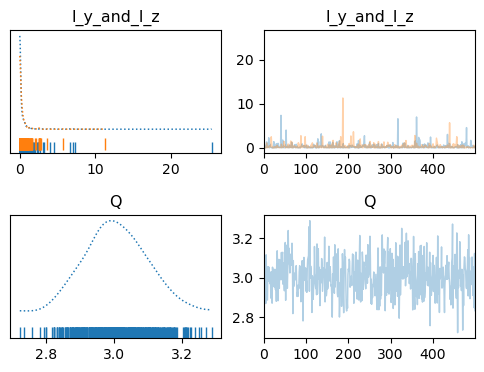

In [4]:



sandbox = Sandbox(results_name=results_name, 
                  data_params=data_params,
                  default_params=default_params)

visualiser = sandbox.run()
sandbox.sampler.test_priors()

visualiser.get_summary()
visualiser.get_traceplot()
visualiser.get_autocorrelations()
visualiser.get_prior_plots(prior_plots)
 
domain = Domain('cone_from_source_z_limited', resolution=80)
domain.add_domain_param('r', 1000)
domain.add_domain_param('theta', np.pi/8)
domain.add_domain_param('source', [0,0,5])
domain.add_domain_param('z_slice', 0)
domain.add_domain_param('y_slice', 0)
domain.add_domain_param('x_slice', 100)


visualiser.visualise_results(domain = domain, plot_type = '2D_slice', name = 'small_scale', title='Log Concentration of Droplets', log_results=False)
visualiser.visualise_results(domain = domain, plot_type = '3D', name = 'small_scale', title='Log Concentration of Droplets', log_results=False)